In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv("StockX-Data-Contest-2019-3-Raw-Data.csv")
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/2016,11.0,California
1,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/2016,11.0,California
2,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/2016,11.0,California
3,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/2016,11.5,Kentucky
4,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/2017,11.0,Rhode Island


In [4]:
df.describe()

,Shoe Size
count,99956.000000
mean,9.344181
std,2.329588
min,3.500000
25%,8.000000
50%,9.500000
75%,11.000000
max,17.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [6]:
df.describe(include=[object])
#wow! 72162 Yeezys vs 27794 non Yeezys ordered

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Buyer Region
count,99956,99956,99956,99956,99956,99956,99956
unique,531,2,50,1489,8,35,51
top,11/16/2018,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,$270,$220,6/30/2018,California
freq,1388,72162,11423,1641,71707,11423,19349


#### Only shoe size got stored as a float data type. Everything else got stored as a pandas object.
#### Next, I will change 'Sale Price', 'Retail Price' to int64 and 'Order Date' and 'Release Date' to date-time

In [7]:
# df["Sale Price"] = df["Sale Price"].astype('int64') #looks like the `$` character is preventing changing the data type

In [8]:
#googled how to remove `$` from column
df["Sale Price"] = df["Sale Price"].replace('[\$,]','',regex=True).astype('int64')
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,$220,9/24/2016,11.0,California
1,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,$220,11/23/2016,11.0,California
2,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,$220,11/23/2016,11.0,California
3,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,$220,11/23/2016,11.5,Kentucky
4,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,$220,2/11/2017,11.0,Rhode Island


In [9]:
df["Retail Price"] = df["Retail Price"].replace('[\$,]','',regex=True).astype('int64')
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,9/24/2016,11.0,California
1,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,11/23/2016,11.0,California
2,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,11/23/2016,11.0,California
3,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,11/23/2016,11.5,Kentucky
4,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2/11/2017,11.0,Rhode Island


In [10]:
df.dtypes

Order Date       object
Brand            object
Sneaker Name     object
Sale Price        int64
Retail Price      int64
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object

### Changed the order data and sale price to datetime data types

In [11]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format="%m/%d/%Y")

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%Y")

In [13]:
df.describe()

,Sale Price,Retail Price,Shoe Size
count,99956.000000,99956.00000,99956.000000
mean,446.634719,208.61359,9.344181
std,255.982969,25.20001,2.329588
min,186.000000,130.00000,3.500000
25%,275.000000,220.00000,8.000000
50%,370.000000,220.00000,9.500000
75%,540.000000,220.00000,11.000000
max,4050.000000,250.00000,17.000000


In [14]:
df.dtypes

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price               int64
Retail Price             int64
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
dtype: object

### want to install matplotlib so I could do some quick visuals

In [15]:
import matplotlib.pyplot as plt   #not sure how to use matplotlib lol

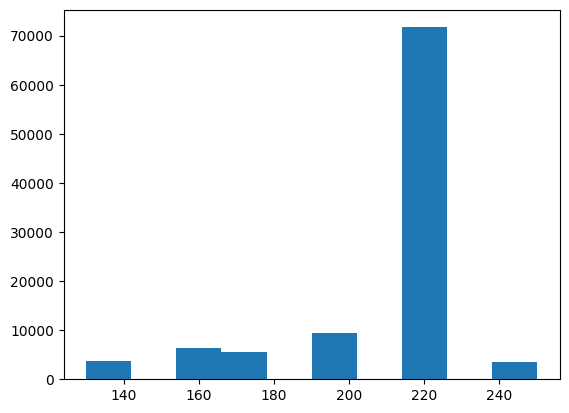

In [16]:
#trying to make a histograph of retail price
plt.hist(df["Retail Price"])
plt.show()

#looks like retail prices is rather discrete compared to sales price

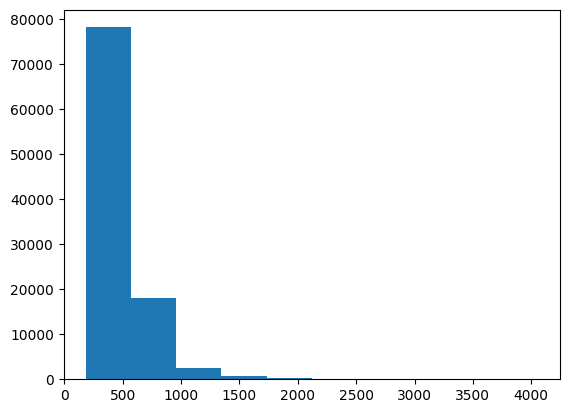

In [17]:
plt.hist(df["Sale Price"])
plt.show()

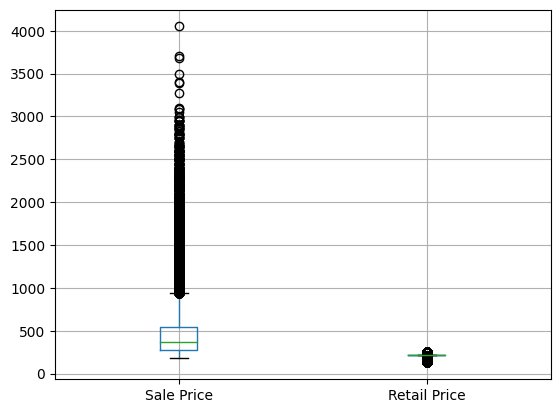

In [18]:
boxplot = df.boxplot(column=['Sale Price', 'Retail Price'])

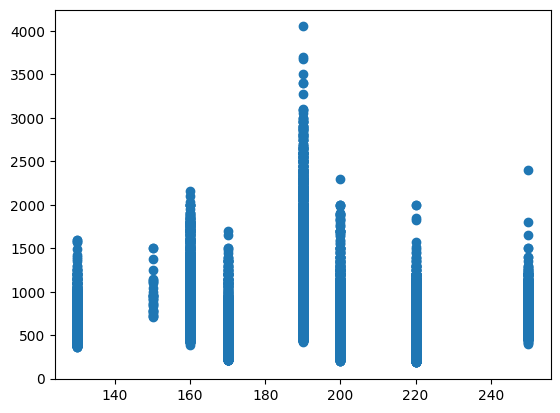

In [19]:
plt.scatter(df["Retail Price"], df["Sale Price"])
plt.show()

#is that sale price of $4000-ish correct?

#### Locate the row that contains the max sales price = $4050

In [20]:
filt = df['Sale Price'] == 4050
df.loc[filt]

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
26870,2018-05-26,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,4050,190,2017-09-09,6.0,Wisconsin


In [21]:
df.nunique()

Order Date       531
Brand              2
Sneaker Name      50
Sale Price      1489
Retail Price       8
Release Date      35
Shoe Size         26
Buyer Region      51
dtype: int64

In [22]:
# yes, the sale price is legit - checked out the shoe, size 6 is currently resaling for $20K.

### Profit Margin Column = Sale Price - Retail Price

In [23]:
df['Profit Margin'] = df['Sale Price'] - df['Retail Price']
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608
...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565,220,2018-12-26,8.0,Oregon,345
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598,220,2018-12-26,8.5,California,378
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605,220,2018-12-26,5.5,New York,385
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650,220,2018-12-26,11.0,California,430


In [24]:
df.describe()
#there is an instance where the shoe seller lost money (min = -$34)

,Sale Price,Retail Price,Shoe Size,Profit Margin
count,99956.000000,99956.00000,99956.000000,99956.000000
mean,446.634719,208.61359,9.344181,238.021129
std,255.982969,25.20001,2.329588,266.133179
min,186.000000,130.00000,3.500000,-34.000000
25%,275.000000,220.00000,8.000000,58.000000
50%,370.000000,220.00000,9.500000,154.000000
75%,540.000000,220.00000,11.000000,342.000000
max,4050.000000,250.00000,17.000000,3860.000000


In [25]:
df.dtypes

Order Date       datetime64[ns]
Brand                    object
Sneaker Name             object
Sale Price                int64
Retail Price              int64
Release Date     datetime64[ns]
Shoe Size               float64
Buyer Region             object
Profit Margin             int64
dtype: object

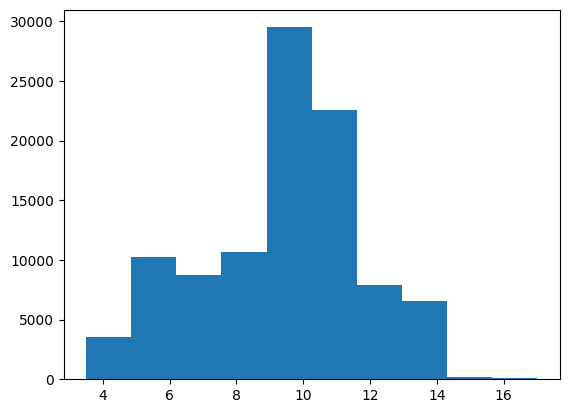

In [26]:
plt.hist(df["Shoe Size"])
plt.show()

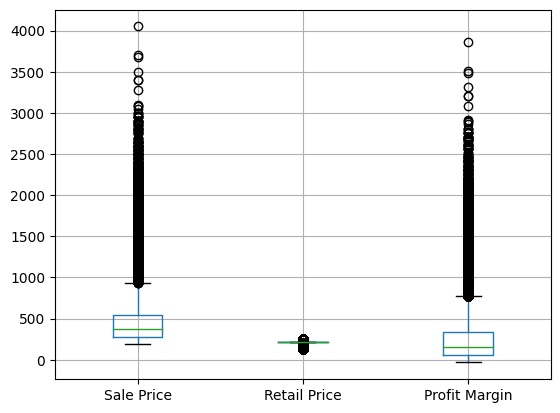

In [27]:
boxplot = df.boxplot(column=['Sale Price', 'Retail Price', 'Profit Margin'])

# Now, trying to make sense of the Sneaker Name column
- I want to extract the colorway, but it's not always the last word in the cell - it could be the last 3 words (at least in the Yeezys)
- I also want to extract the silhouette. 
- The brand name column is fine - Yeezy = Adidas, Off-White = Nike

### YEEZY

In [28]:
'''
filt = df['Brand'] == 'Yeezy'
df.loc[filt]

#not returning anything...
'''

"\nfilt = df['Brand'] == 'Yeezy'\ndf.loc[filt]\n\n#not returning anything...\n"

In [29]:
filt = df['Brand'].str.contains('Yeezy')
df.loc[filt]
#turns out there is a space in front of " Yeezy", so using .str.contains('Yeezy')

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608
...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565,220,2018-12-26,8.0,Oregon,345
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598,220,2018-12-26,8.5,California,378
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605,220,2018-12-26,5.5,New York,385
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650,220,2018-12-26,11.0,California,430


In [30]:
df.loc[filt, 'Sneaker Name'].value_counts()
#.value_counts() on the filter to see what all the Yeezys "Sneaker Names"

adidas-Yeezy-Boost-350-V2-Butter                 11423
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0            10395
Adidas-Yeezy-Boost-350-V2-Zebra                  10110
Adidas-Yeezy-Boost-350-V2-Blue-Tint               9297
Adidas-Yeezy-Boost-350-V2-Cream-White             9097
Adidas-Yeezy-Boost-350-V2-Sesame                  5553
adidas-Yeezy-Boost-350-V2-Static                  4983
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow      4854
adidas-Yeezy-Boost-350-V2-Static-Reflective       3184
Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017      969
Adidas-Yeezy-Boost-350-V2-Core-Black-White         621
Adidas-Yeezy-Boost-350-Low-V2-Beluga               498
Adidas-Yeezy-Boost-350-V2-Core-Black-Red           302
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper        225
Adidas-Yeezy-Boost-350-V2-Core-Black-Green         196
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016       122
Adidas-Yeezy-Boost-350-Low-Moonrock                100
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015        95
Adidas-Yee

How many unique "Sneaker Names" for Yeezy?
- 20 different colorways

In [31]:
#how many unique "Sneaker Names" for "Yeezys"?
df.loc[filt, 'Sneaker Name'].nunique()

# 20 different colorways

20

How many of each type of silhouette? It should be just 350 or 350 V2 from the looks of it. But I want to practice coding.
- 15 V2 (5 of other types, could be V1 or something else?

In [32]:
#how many 350 V2?
filt_2 = df['Sneaker Name'].str.contains('V2')
df.loc[filt_2, 'Sneaker Name'].nunique()

#15 V2  
# I think this code looked at the whole data frame, not just the filted Yeezy Data frame

15

In [33]:
filt = df['Brand'].str.contains('Yeezy')
yzy_df = df.loc[filt]
yzy_df

#creating a temporary data frame to hopefully run filters through

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608
...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565,220,2018-12-26,8.0,Oregon,345
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598,220,2018-12-26,8.5,California,378
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605,220,2018-12-26,5.5,New York,385
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650,220,2018-12-26,11.0,California,430


In [34]:
filt_3 = yzy_df['Sneaker Name'].str.contains("V2|v2")
yzy_df.loc[filt_3, 'Sneaker Name'].nunique()

#tried "v2" only but turns out its case sensitive
#returns 15 sneakers

15

In [35]:
filt_3 = yzy_df['Sneaker Name'].str.contains("V2|v2")==False
yzy_df.loc[filt_3, 'Sneaker Name'].nunique()

# returns 5 sneakers

5

### Reg Ex
- just decided to hard code in the colorways - I know what I want to do to the regular expression but I don't know how to get the syntax to do it.
- not sure if I should filter the original df or yzy_df to create a new column.

In [36]:
yzy_df['Sneaker Name'].str.extract('(Butter|Beluga-2pt0|Zebra|Blue-Tint|Cream-White|Sesame|Static|Semi-Frozen-Yellow|Static-Reflective|Core-Black-Red-2017|Core-Black-White|Beluga|Core-Black-Red|Core-Black-Copper|Core-Black-Green|Pirate-Black-2016|Moonrock|Turtledove|Pirate-Black-2015|Oxford-Tan|Turtledove)')

,0
0,Beluga
1,Core-Black-Copper
2,Core-Black-Green
3,Core-Black-Red
4,Core-Black-Red-2017
...,...
99951,Static
99952,Static
99953,Static
99954,Static


In [37]:
filt_4 = yzy_df['Sneaker Name'].str.extract('(Butter|Beluga-2pt0|Zebra|Blue-Tint|Cream-White|Sesame|Static|Semi-Frozen-Yellow|Static-Reflective|Core-Black-Red-2017|Core-Black-White|Beluga|Core-Black-Red|Core-Black-Copper|Core-Black-Green|Pirate-Black-2016|Moonrock|Turtledove|Pirate-Black-2015|Oxford-Tan|Turtledove)')
yzy_df.loc[0].isna().sum()

#no null values

0

In [38]:
yzycolor_df = yzy_df['Sneaker Name'].str.extract('(Butter|Beluga-2pt0|Zebra|Blue-Tint|Cream-White|Sesame|Static|Semi-Frozen-Yellow|Static-Reflective|Core-Black-Red-2017|Core-Black-White|Beluga|Core-Black-Red|Core-Black-Copper|Core-Black-Green|Pirate-Black-2016|Moonrock|Turtledove|Pirate-Black-2015|Oxford-Tan|Turtledove)')
yzycolor_df.head()

,0
0,Beluga
1,Core-Black-Copper
2,Core-Black-Green
3,Core-Black-Red
4,Core-Black-Red-2017


In [39]:
yzy_df['Colorway'] = yzycolor_df

C:\Users\kaili\AppData\Local\Temp\ipykernel_32552\608505191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yzy_df['Colorway'] = yzycolor_df


In [40]:
# can't get the new colorway column into the yzy_df

In [41]:
yzy_df['Colorway'] = yzy_df['Sneaker Name'].str.extract('(Low-V\d|V\d|Low)-(.*)').loc[:,1]
#data frame - use 1

C:\Users\kaili\AppData\Local\Temp\ipykernel_32552\2231988796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yzy_df['Colorway'] = yzy_df['Sneaker Name'].str.extract('(Low-V\d|V\d|Low)-(.*)').loc[:,1]


In [42]:
yzy_df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877,Beluga
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465,Core-Black-Copper
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470,Core-Black-Green
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855,Core-Black-Red
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608,Core-Black-Red-2017


### Extracting silhouette from "sneaker name"
- V2 is one silhouette and not V2 is a another one
- I think I might not have to use regular expressions for this and just use a .str.extract() ??
- How to join yzy_df to original df?

In [43]:
'''
yzy_df['Sneaker Name'].str.extract('V2')
#not working... I wonder if I should create a function that says if "sneaker name" contains "V2" then store "V2" in a new column. If it doesn't, then say "V1"
'''

'\nyzy_df[\'Sneaker Name\'].str.extract(\'V2\')\n#not working... I wonder if I should create a function that says if "sneaker name" contains "V2" then store "V2" in a new column. If it doesn\'t, then say "V1"\n'

In [44]:
#create a new column called "Silhouette" - now do I replace text true=V2, false=V1
yzy_df['Silhouette'] = yzy_df['Sneaker Name'].str.contains("V2")
yzy_df

C:\Users\kaili\AppData\Local\Temp\ipykernel_32552\4227743736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yzy_df['Silhouette'] = yzy_df['Sneaker Name'].str.contains("V2")


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway,Silhouette
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877,Beluga,True
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465,Core-Black-Copper,True
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470,Core-Black-Green,True
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855,Core-Black-Red,True
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608,Core-Black-Red-2017,True
...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565,220,2018-12-26,8.0,Oregon,345,Static-Reflective,True
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598,220,2018-12-26,8.5,California,378,Static-Reflective,True
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605,220,2018-12-26,5.5,New York,385,Static-Reflective,True
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650,220,2018-12-26,11.0,California,430,Static-Reflective,True


In [45]:
yzy_df['Silhouette'].isna().sum()
#no null values

0

In [46]:
yzy_df['Silhouette'].value_counts()
#71707 V2s and 455 V1s

True     71707
False      455
Name: Silhouette, dtype: int64

#### ?? Trying to replace "True" with "V2" but I can't get it to work

In [47]:

yzy_df['Silhouette'] = yzy_df['Silhouette'].replace({True: 'V2', False: 'V1'})
yzy_df.head()

#keeps setting "True" to "None" ...


C:\Users\kaili\AppData\Local\Temp\ipykernel_32552\3081653485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yzy_df['Silhouette'] = yzy_df['Silhouette'].replace({True: 'V2', False: 'V1'})


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway,Silhouette
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877,Beluga,V2
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465,Core-Black-Copper,V2
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470,Core-Black-Green,V2
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855,Core-Black-Red,V2
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608,Core-Black-Red-2017,V2


# OFF-WHITE

### Now working on Regex with the Off-White Sneakers

In [48]:
filt = df['Brand'].str.contains('Off-White')
df.loc[filt]

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin
128,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1600,160,2017-09-09,8.0,California,1440
129,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1090,160,2017-09-09,11.5,New York,930
130,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1344,160,2017-09-09,10.0,New York,1184
131,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1325,160,2017-09-09,10.0,Massachusetts,1165
132,2017-09-07,Off-White,Nike-Air-VaporMax-Off-White,1800,250,2017-09-09,12.0,Kentucky,1550
...,...,...,...,...,...,...,...,...,...
99869,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,265,170,2018-11-28,11.0,New York,95
99870,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,331,170,2018-11-28,4.0,California,161
99871,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,405,170,2018-11-28,6.0,New York,235
99872,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,263,170,2018-11-28,10.0,Maryland,93


In [49]:
df.loc[filt, 'Sneaker Name'].value_counts()

Air-Jordan-1-Retro-High-Off-White-University-Blue    4635
Nike-Air-Presto-Off-White-Black-2018                 1884
Nike-Air-Presto-Off-White-White-2018                 1883
Nike-Air-VaporMax-Off-White-2018                     1591
Nike-Blazer-Mid-Off-White-All-Hallows-Eve            1435
Nike-Blazer-Mid-Off-White-Grim-Reaper                1398
Nike-Zoom-Fly-Off-White-Pink                         1359
Nike-Air-VaporMax-Off-White-Black                    1313
Nike-Zoom-Fly-Off-White-Black-Silver                 1222
Nike-Air-Force-1-Low-Off-White-Volt                  1019
Nike-Air-Force-1-Low-Off-White-Black-White            960
Air-Jordan-1-Retro-High-Off-White-Chicago             755
Nike-Air-Max-90-Off-White-Black                       722
Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange        656
Nike-Air-Max-90-Off-White-Desert-Ore                  649
Nike-Zoom-Fly-Mercurial-Off-White-Black               645
Nike-Air-Max-90-Off-White                             627
Nike-Air-Prest

In [50]:
df.loc[filt, 'Sneaker Name'].nunique()
# 30 sneakers for OFF-WHITE Label

30

#### What I notice in Off-White:
- some shoes don't seem to have a colorway listed, such as Nike-Zoom-Fly-Off-White and Nike-Blazer-Mid-Off-White
- I wonder if there is a way to tell which colorway it was - looking up the shoe the white colorway seems to be resaling for the most $
- it appears that the silhouette is before the "off-white" text and the colorway, if any, is listed afterwards

RegEx
- `(.*)(?:-Off-White-|Off-White|Off-White-)(.*)`
- but this is including the "-" characters for capture group 1 and 3 at the end/start of the group

In [51]:
filt_2 = df['Brand'].str.contains('Off-White')
off_df = df.loc[filt_2]
off_df

#27794 rows

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin
128,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1600,160,2017-09-09,8.0,California,1440
129,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1090,160,2017-09-09,11.5,New York,930
130,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1344,160,2017-09-09,10.0,New York,1184
131,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1325,160,2017-09-09,10.0,Massachusetts,1165
132,2017-09-07,Off-White,Nike-Air-VaporMax-Off-White,1800,250,2017-09-09,12.0,Kentucky,1550
...,...,...,...,...,...,...,...,...,...
99869,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,265,170,2018-11-28,11.0,New York,95
99870,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,331,170,2018-11-28,4.0,California,161
99871,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,405,170,2018-11-28,6.0,New York,235
99872,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,263,170,2018-11-28,10.0,Maryland,93


In [52]:
offcolor_df = off_df['Sneaker Name'].str.extract('(.*)-?(?:-Off-White)-?(.*)')
offcolor_df

#removed the "-" with new regex

,0,1
128,Nike-Air-Max-90,
129,Nike-Air-Max-90,
130,Nike-Air-Presto,
131,Nike-Air-Presto,
132,Nike-Air-VaporMax,
...,...,...
99869,Nike-Zoom-Fly,Pink
99870,Nike-Zoom-Fly,Pink
99871,Nike-Zoom-Fly,Pink
99872,Nike-Zoom-Fly,Pink


In [53]:
offcolor_df.loc[128]
#Air Max 90 didn't have a colorway listed
#trying to count the null/blank cells

0    Nike-Air-Max-90
1                   
Name: 128, dtype: object

In [54]:
offcolor_df.isnull().sum()
#doesn't make sense...

0    0
1    0
dtype: int64

In [63]:
offcolor_df[1].value_counts()

University-Blue         4635
unknown                 4188
Black                   2969
Black-2018              1884
White-2018              1883
2018                    1591
All-Hallows-Eve         1435
Grim-Reaper             1398
Pink                    1359
Black-Silver            1222
Volt                    1019
Black-White              960
Chicago                  755
Total-Orange             656
Desert-Ore               649
Menta                    343
White                    313
Wolf-Grey                288
Elemental-Rose-Queen     216
AF100                     31
Name: 1, dtype: int64

In [60]:
filt = offcolor_df[1].str.len() == 0
offcolor_df.loc[filt, 1] = 'Unknown'

In [62]:
offcolor_df[1].str.len()

128      7
129      7
130      7
131      7
132      7
        ..
99869    4
99870    4
99871    4
99872    4
99873    4
Name: 1, Length: 27794, dtype: int64

In [59]:
offcolor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27794 entries, 128 to 99873
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       27794 non-null  object
 1   1       27794 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [64]:
offcolor_df

,0,1
128,Nike-Air-Max-90,unknown
129,Nike-Air-Max-90,unknown
130,Nike-Air-Presto,unknown
131,Nike-Air-Presto,unknown
132,Nike-Air-VaporMax,unknown
...,...,...
99869,Nike-Zoom-Fly,Pink
99870,Nike-Zoom-Fly,Pink
99871,Nike-Zoom-Fly,Pink
99872,Nike-Zoom-Fly,Pink


In [66]:
off_df['Colorway'] = offcolor_df[1]
off_df.head()

C:\Users\kaili\AppData\Local\Temp\ipykernel_32552\222895550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_df['Colorway'] = offcolor_df[1]


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway
128,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1600,160,2017-09-09,8.0,California,1440,unknown
129,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1090,160,2017-09-09,11.5,New York,930,unknown
130,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1344,160,2017-09-09,10.0,New York,1184,unknown
131,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1325,160,2017-09-09,10.0,Massachusetts,1165,unknown
132,2017-09-07,Off-White,Nike-Air-VaporMax-Off-White,1800,250,2017-09-09,12.0,Kentucky,1550,unknown


In [67]:
off_df['Silhouette'] = offcolor_df[0]
off_df.head()

C:\Users\kaili\AppData\Local\Temp\ipykernel_32552\4146499909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_df['Silhouette'] = offcolor_df[0]


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway,Silhouette
128,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1600,160,2017-09-09,8.0,California,1440,unknown,Nike-Air-Max-90
129,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1090,160,2017-09-09,11.5,New York,930,unknown,Nike-Air-Max-90
130,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1344,160,2017-09-09,10.0,New York,1184,unknown,Nike-Air-Presto
131,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1325,160,2017-09-09,10.0,Massachusetts,1165,unknown,Nike-Air-Presto
132,2017-09-07,Off-White,Nike-Air-VaporMax-Off-White,1800,250,2017-09-09,12.0,Kentucky,1550,unknown,Nike-Air-VaporMax


# QUESTIONS
- how to count the blank cells in offcolor_df --> these will indicate that no colorway was listed
- yzy_df --> how to replace "true" with "V2" and "false" with "V1"
- fix time delta issues (datatype)
- once I've extracted the colors and silhouettes from the off-whites and yeezys, how do I add those new columns to the original df? Do i do a join of some kind?

# Joining the yzy_df and off_df
- previously, I created two data frames, one for Yeezy and one for Off-White
- I extracted the colorway and silhouettes from the sneaker name
- now, I need to join these df into one, they can be stacked on top of each other 

In [75]:
df = pd.concat([yzy_df, off_df])
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway,Silhouette
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877,Beluga,V2
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465,Core-Black-Copper,V2
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470,Core-Black-Green,V2
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855,Core-Black-Red,V2
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608,Core-Black-Red-2017,V2


#### Help with filter
- I am trying to code how many sneaker names, within the filter that do not have 'V2' in the sneaker name column. `df.loc[filt, 'Sneaker Name'].value_counts()`
- I think I need to pass a filter within a filter, possibly use the `~` or `!` operators. I don't know how to do this.

### figured it out - made a new data frame

### Want to create a column of "Elapsed Time" between release date and sale date to see if that time is related to profit margin

In [76]:
from datetime import datetime

In [77]:
df['Elapsed Time'] = df['Order Date'] - df['Release Date']
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway,Silhouette,Elapsed Time
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877,Beluga,V2,342 days
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465,Core-Black-Copper,V2,282 days
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470,Core-Black-Green,V2,282 days
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855,Core-Black-Red,V2,282 days
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608,Core-Black-Red-2017,V2,202 days


In [78]:
df.dtypes      #how to change the timedelta object to an int64?

Order Date        datetime64[ns]
Brand                     object
Sneaker Name              object
Sale Price                 int64
Retail Price               int64
Release Date      datetime64[ns]
Shoe Size                float64
Buyer Region              object
Profit Margin              int64
Colorway                  object
Silhouette                object
Elapsed Time     timedelta64[ns]
dtype: object

In [79]:
df['Elapsed Time'] = df['Elapsed Time'].dt.days    #somehow, I converted "Elapsed Time" to int64

In [80]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway,Silhouette,Elapsed Time
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877,Beluga,V2,342
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465,Core-Black-Copper,V2,282
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470,Core-Black-Green,V2,282
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855,Core-Black-Red,V2,282
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608,Core-Black-Red-2017,V2,202


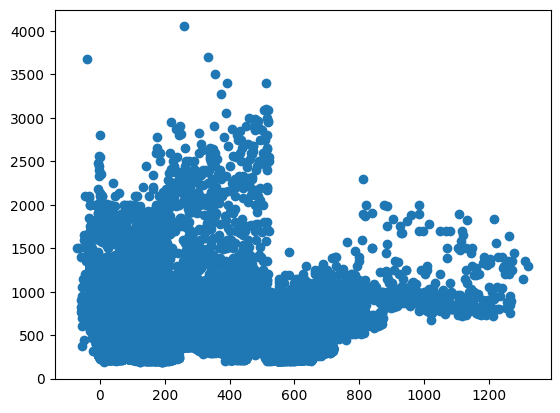

In [81]:
plt.scatter(df["Elapsed Time"], df["Sale Price"])
plt.show()

#not really sure what is going on in the x-axis... Does it have to do with timedelta datatype? Is it years instead of days?
#when I somehow convert data types the scatterplot changed to days.

In [82]:
#renaming column to "Elapsed Time Days"
df.rename(columns={"Elapsed Time": "Elapsed Time Days"}, inplace=True)
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway,Silhouette,Elapsed Time Days
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877,Beluga,V2,342
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465,Core-Black-Copper,V2,282
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470,Core-Black-Green,V2,282
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855,Core-Black-Red,V2,282
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608,Core-Black-Red-2017,V2,202


In [83]:
df['Elapsed Time Weeks'] = round(df['Elapsed Time Days'] * 52 / 365 , 1)
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway,Silhouette,Elapsed Time Days,Elapsed Time Weeks
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877,Beluga,V2,342,48.7
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465,Core-Black-Copper,V2,282,40.2
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470,Core-Black-Green,V2,282,40.2
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855,Core-Black-Red,V2,282,40.2
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608,Core-Black-Red-2017,V2,202,28.8


In [84]:
df['Elapsed Time Years'] = round(df['Elapsed Time Days'] / 365 , 2)
df.head()

# I don't think the "Elapsed Time Years" column will be useful - I think weeks and days is more fine tuned and will make sense for stakeholders.

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway,Silhouette,Elapsed Time Days,Elapsed Time Weeks,Elapsed Time Years
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877,Beluga,V2,342,48.7,0.94
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465,Core-Black-Copper,V2,282,40.2,0.77
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470,Core-Black-Green,V2,282,40.2,0.77
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855,Core-Black-Red,V2,282,40.2,0.77
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608,Core-Black-Red-2017,V2,202,28.8,0.55


In [85]:
df['Release Date Year'] = df['Release Date'].dt.year
df['Release Date Month'] = df['Release Date'].dt.month
df['Release Date Day'] = df['Release Date'].dt.day
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway,Silhouette,Elapsed Time Days,Elapsed Time Weeks,Elapsed Time Years,Release Date Year,Release Date Month,Release Date Day
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877,Beluga,V2,342,48.7,0.94,2016,9,24
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465,Core-Black-Copper,V2,282,40.2,0.77,2016,11,23
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470,Core-Black-Green,V2,282,40.2,0.77,2016,11,23
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855,Core-Black-Red,V2,282,40.2,0.77,2016,11,23
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608,Core-Black-Red-2017,V2,202,28.8,0.55,2017,2,11


In [86]:
df['Order Date Year'] = df['Order Date'].dt.year
df['Order Date Month'] = df['Order Date'].dt.month
df['Order Date Day'] = df['Order Date'].dt.day
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway,Silhouette,Elapsed Time Days,Elapsed Time Weeks,Elapsed Time Years,Release Date Year,Release Date Month,Release Date Day,Order Date Year,Order Date Month,Order Date Day
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877,Beluga,V2,342,48.7,0.94,2016,9,24,2017,9,1
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465,Core-Black-Copper,V2,282,40.2,0.77,2016,11,23,2017,9,1
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470,Core-Black-Green,V2,282,40.2,0.77,2016,11,23,2017,9,1
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855,Core-Black-Red,V2,282,40.2,0.77,2016,11,23,2017,9,1
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608,Core-Black-Red-2017,V2,202,28.8,0.55,2017,2,11,2017,9,1


# I think I have the data cleaned now!
 - how do I export it...

In [88]:
df.to_csv('StockX-Data-Contest-2019-3-Clean-Data.csv', index=False)